In [1]:
pip install transformers

In [2]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
image_folder = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/CLIP_Search/images"

In [6]:
import os

image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('png', 'jpg', 'jpeg'))]
images = [Image.open(file) for file in image_files]

In [7]:
target_image_path = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/CLIP_Search/images/cat1.jpg"

In [8]:
target_image = Image.open(target_image_path)

In [9]:
def extract_features(images):
    inputs = processor(images=images, return_tensors="pt", padding=True)
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    return features

target_features = extract_features([target_image])
image_features = extract_features(images)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(target_features, image_features).flatten()

indices = similarities.argsort()[::-1]

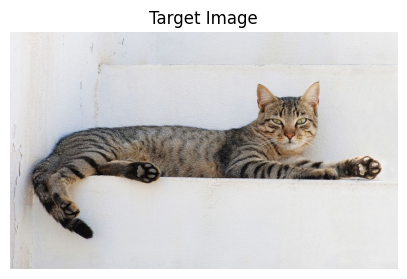

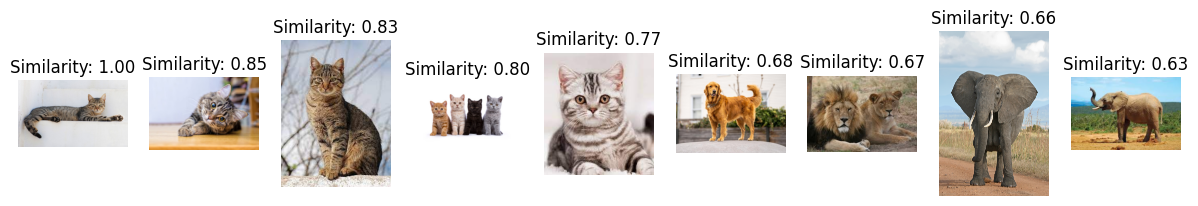

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(target_image)
plt.title("Target Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[idx])
    plt.title(f"Similarity: {similarities[idx]:.2f}")
    plt.axis("off")
plt.show()

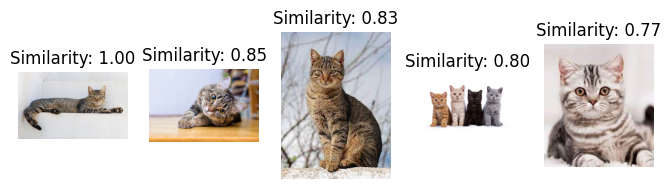

In [13]:
threshold = 0.75

filtered_indices = [i for i, sim in enumerate(similarities) if sim >= threshold]

filtered_indices = sorted(filtered_indices, key=lambda i: similarities[i], reverse=True)


plt.figure(figsize=(15, 5))
for i, idx in enumerate(filtered_indices):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[idx])
    plt.title(f"Similarity: {similarities[idx]:.2f}")
    plt.axis("off")
plt.show()

In [14]:
def get_images(target_image_path, images):
  target_image = Image.open(target_image_path)

  image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('png', 'jpg', 'jpeg'))]
  images = [Image.open(file) for file in image_files]

  target_features = extract_features([target_image])
  image_features = extract_features(images)

  similarities = cosine_similarity(target_features, image_features).flatten()

  threshold = 0.75

  filtered_indices = [i for i, sim in enumerate(similarities) if sim >= threshold]

  filtered_indices = sorted(filtered_indices, key=lambda i: similarities[i], reverse=True)


  plt.figure(figsize=(15, 5))
  for i, idx in enumerate(filtered_indices):
      plt.subplot(1, len(filtered_indices), i + 1)
      plt.imshow(images[idx])
      plt.title(f"Similarity: {similarities[idx]:.2f}")
      plt.axis("off")
  plt.show()

In [15]:
target_image_path = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/CLIP_Search/images/elephant1.jpg"
image_folder = "/content/drive/MyDrive/Computer_vision/Large_Vision_Models/CLIP_Search/images"

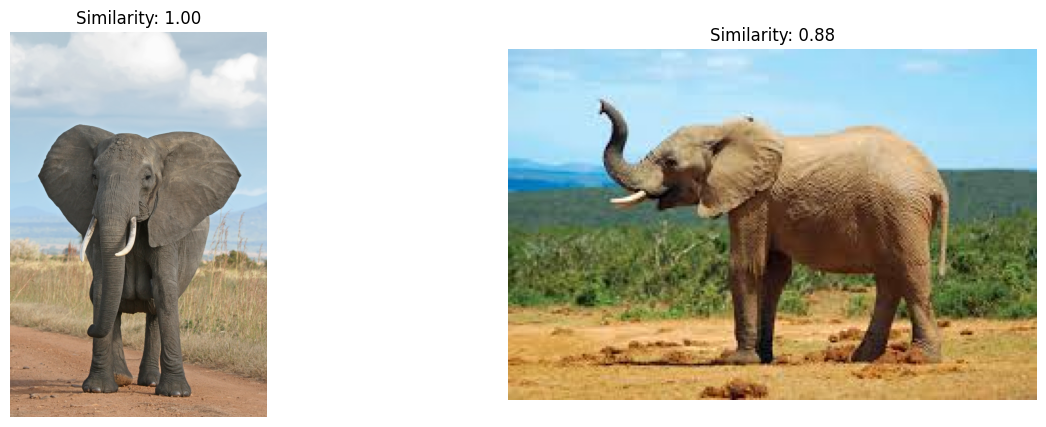

In [16]:
get_images(target_image_path, image_folder)